# Assignment 1

Build four predictive models using linear regression for earnings per hour.
1. Models: the target variable is earnings per hour, all others would be predictors.
2. Model 1 shall be the simplest, model 4 the more complex. It shall be OLS. You shall
explain your choice of predictors.
3. Compare model performance of these models (a) RMSE in the full sample, (2) crossvalidated RMSE and (c) BIC in the full sample.
4. Discuss the relationship between model complexity and performance. You may use visual
aids.
5. You should submit your code in Github and a 1 page report in pdf on Moodle along with
the final Jupyter notebook file


## Introduction
In this project, we're looking at how different things like age, whether someone is male or female, their race, if they're married, and their education level can affect how much money sales representatives make every hour. We're using a big set of data called the Current Population Survey (CPS) that gives us information about how much people earn every week and other details about them. We're going to make four different models, or ways of guessing earnings, starting with a really simple one and then making them more complex. We want to see which model does the best job at guessing how much money people make. We'll check how good our models are by looking at their errors and how well they work on new data they haven't seen before.

In [1]:
# importing libraries

import os
import sys
import warnings
from my_functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm

# ignore warnings
warnings.filterwarnings("ignore")
# turn off scientific notation
# pd.set_option("display.float_format", lambda x: "%.2f" % x)
# show all columns
pd.set_option('display.max_columns',None)

### Initial Setup
In this section, we prepare our environment by importing necessary libraries and setting configurations to ensure our analysis runs smoothly. This includes libraries for data manipulation, visualization, statistical modeling, and custom functions from our my_functions.py file to aid in our analysis.

In [2]:
# import the dataset
df = pd.read_csv('https://osf.io/download/4ay9x/')
df.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,29,2,7,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,27,2,1,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,30,1,1,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,48,1,1,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,46,2,1,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


### Data Acquisition
The dataset is loaded from a remote source into our environment. This dataset, derived from the Current Population Survey (CPS), provides comprehensive information about individuals' earnings and other demographic details, crucial for our analysis.

In [3]:
# check the structure
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012
count,149316.000000,1.493160e+05,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,20071.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000
mean,158796.895095,4.510656e+14,2375.618819,888.834343,38.939819,40.807958,1.424456,2.549250,40.706810,1.493839,3.461250,0.643729,1.770935,4161.185640
std,91294.406095,3.227225e+14,1295.345801,643.737322,10.259280,2.502888,1.333825,2.382705,12.776095,0.499964,2.740185,1.022607,3.075455,2570.644535
min,3.000000,5.893210e+09,53.232500,0.010000,1.000000,31.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000
25%,79751.500000,1.368508e+14,1271.730300,430.000000,40.000000,39.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,2200.000000
50%,158971.500000,4.114799e+14,2662.681950,719.600000,40.000000,40.000000,1.000000,1.000000,41.000000,1.000000,1.000000,0.000000,0.000000,4220.000000
75%,237719.250000,7.340299e+14,3319.093575,1153.840000,40.000000,43.000000,1.000000,4.000000,52.000000,2.000000,7.000000,1.000000,3.000000,5700.000000
max,317056.000000,9.999907e+14,24595.832400,2884.610000,99.000000,46.000000,26.000000,8.000000,64.000000,2.000000,7.000000,10.000000,15.000000,9750.000000


In [4]:
# check the number of rows
df.shape

(149316, 23)

## Enhancing the dataset. Feature engineering

In this stage, our objective is to refine the dataset, ensuring it's well-prepared for the predictive modeling process. We begin by transforming weekly earnings into hourly wages, providing a consistent basis for comparing earnings across different individuals. Additionally, we convert various categorical variables such as gender, race, and educational qualifications into numerical format, facilitating their integration into our statistical models.

Recognizing the nuanced relationship between age and earnings, we introduce polynomial terms of age up to the fourth power. This approach allows our models to capture potential non-linear patterns, offering a more detailed understanding of how earnings may vary with age.

We also encode demographic variables like marital status and the presence of children, along with job-related factors such as employment sector, industry codes, and union membership. These variables often play a significant role in determining earnings and are, therefore, crucial components of our analysis.

Through these transformations, we aim to enrich our dataset, ensuring that it accurately mirrors the complexities inherent in the labor market. This meticulous preparation sets the stage for developing robust models capable of making insightful predictions about hourly earnings.

In [5]:
# transforming the variables
df["w"] = df["earnwke"] / df["uhours"] # calculating hourly wage
df["female"] = (df["sex"] == 2).astype(int) # adding female column
df["ed_MA"] = (df["grade92"] == 44).astype(int) # adding ma binary
df["ed_Profess"] = (df["grade92"] == 45).astype(int) # adding professional degree binary
df["ed_Phd"] = (df["grade92"] == 46).astype(int) # adding phd binary
df["lnw"] = np.log(df["w"]) # natural logarithm
df["agesq"] = np.power(df["age"], 2) # age squared
df["agecu"] = np.power(df["age"], 3) # cube
df["agequ"] = np.power(df["age"], 4) # 4th power

df["white"] = (df["race"] == 1).astype(int) # race white
df["afram"] = (df["race"] == 2).astype(int)
df["asian"] = (df["race"] == 4).astype(int)
df["hisp"] = (df["ethnic"].notna()).astype(int)
df["othernonw"] = (
    (df["white"] == 0) & (df["afram"] == 0) & (df["asian"] == 0) & (df["hisp"] == 0)
).astype(int) # other nonwhite
df["nonUSborn"] = (
    (df["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (df["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int) # non us born


# Potentially endogeneous demographics
# Create 'married' column: 1 if marital status is 1 (married, spouse present) or 2 (married, spouse absent), else 0
df["married"] = ((df["marital"] == 1) | (df["marital"] == 2)).astype(int)

# Create 'divorced' column: 1 if marital status is 3 (separated) or 5 (divorced), else 0
df["divorced"] = ((df["marital"] == 3) & (df["marital"] == 5)).astype(int)

# Create 'widowed' column: 1 if marital status is 4 (widowed), else 0
df["widowed"] = (df["marital"] == 4).astype(int)

# Create 'nevermar' column: 1 if marital status is 7 (never married), else 0
df["nevermar"] = (df["marital"] == 7).astype(int)

# Create 'child0' column: 1 if number of children present is 0, else 0
df["child0"] = (df["chldpres"] == 0).astype(int)

# Create 'child1' column: 1 if number of children present is 1, else 0
df["child1"] = (df["chldpres"] == 1).astype(int)

# Create 'child2' column: 1 if number of children present is 2, else 0
df["child2"] = (df["chldpres"] == 2).astype(int)

# Create 'child3' column: 1 if number of children present is 3, else 0
df["child3"] = (df["chldpres"] == 3).astype(int)

# Create 'child4pl' column: 1 if number of children present is 4 or more, else 0
df["child4pl"] = (df["chldpres"] >= 4).astype(int)

# Work-related variables

# Create 'fedgov' column: 1 if class of worker is 'Government - Federal', else 0
df["fedgov"] = (df["class"] == "Government - Federal").astype(int)

# Create 'stagov' column: 1 if class of worker is 'Government - State', else 0
df["stagov"] = (df["class"] == "Government - State").astype(int)

# Create 'locgov' column: 1 if class of worker is 'Government - Local', else 0
df["locgov"] = (df["class"] == "Government - Local").astype(int)

# Create 'nonprof' column: 1 if class of worker is 'Private, Nonprofit', else 0
df["nonprof"] = (df["class"] == "Private, Nonprofit").astype(int)

# Create 'ind2dig' column: Two-digit industry code derived from 'ind02' and normalized by dividing by 100
df["ind2dig"] = ((pd.Categorical(df["ind02"]).codes + 1) / 100).astype(int)

# Create 'occ2dig' column: Two-digit occupation code derived from 'occ2012' and normalized by dividing by 100
df["occ2dig"] = (df["occ2012"] / 100).astype(int)

# Create 'union' column: 1 if the worker is a union member or covered by a union contract ('unionmme' or 'unioncov' is 'Yes'), else 0
df["union"] = ((df["unionmme"] == "Yes") | (df["unioncov"] == "Yes")).astype(int)


Our objective is to forecast the hourly earnings specifically for individuals in sales roles.<br> We'll focus our analysis on sales and associated occupations, as classified by the Census codes [4700, 4965].<br> The primary variable of interest in this analysis is the hourly earnings. To align our dataset with this goal, it's essential to refine our data, selecting only the relevant records that correspond to our area of study.

In [6]:
# filter the data
orig_data = df[(df['occ2012']>=4700) & (df['occ2012'] <= 4965)]

orig_data.shape
orig_data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,w,female,ed_MA,ed_Profess,ed_Phd,lnw,agesq,agecu,agequ,white,afram,asian,hisp,othernonw,nonUSborn,married,divorced,widowed,nevermar,child0,child1,child2,child3,child4pl,fedgov,stagov,locgov,nonprof,ind2dig,occ2dig,union
34,66,10719043908597,January,AL,3111.4833,1153.0,40,43,1,NaN,61,1,1,0,0,"Native, Born In US",63,Insurance carriers and related activities (524),4710,"Private, For Profit",No,No,Employed-At Work,28.825000,0,0,0,0,3.361243,3721,226981,13845841,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,47,0
43,90,130710094607619,January,AL,3111.4833,1269.0,60,43,1,NaN,62,1,1,0,0,"Native, Born In US",63,Insurance carriers and related activities (524),4810,"Private, For Profit",Yes,NaN,Employed-At Work,21.150000,0,0,0,0,3.051640,3844,238328,14776336,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,48,1
48,109,239095679100848,January,AL,3378.8631,1057.0,60,39,1,NaN,59,1,1,0,0,"Native, Born In US",63,Automobile dealers (4411),4760,"Private, For Profit",No,No,Employed-At Work,17.616667,0,0,0,0,2.868845,3481,205379,12117361,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,47,0
64,157,8097508015161,January,AL,4447.7283,186.0,24,40,1,6.0,22,1,7,0,0,"Native, Born In US",63,4795,4760,"Private, For Profit",No,No,Employed-At Work,7.750000,0,0,0,0,2.047693,484,10648,234256,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,47,0
69,163,38470710696495,January,AL,3587.0087,360.0,40,39,1,NaN,40,1,1,4,10,"Native, Born In US",63,Miscellaneous general merchandise stores (4529),4760,"Private, For Profit",No,No,Employed-At Work,9.000000,0,0,0,0,2.197225,1600,64000,2560000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,47,0


In [7]:
# check the distribution of earnings
orig_data.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,14604.000000,14604.000000,14604.000000
mean,752.790587,37.359627,18.819108
std,648.272748,11.443537,18.293433
min,0.010000,1.000000,0.000250
25%,300.000000,32.000000,9.400000
50%,550.000000,40.000000,14.000000
75%,961.530000,40.000000,23.000000
max,2884.610000,99.000000,1442.305000


In [8]:
# there is only one value more than 1000.
orig_data[orig_data['w']>1000]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,w,female,ed_MA,ed_Profess,ed_Phd,lnw,agesq,agecu,agequ,white,afram,asian,hisp,othernonw,nonUSborn,married,divorced,widowed,nevermar,child0,child1,child2,child3,child4pl,fedgov,stagov,locgov,nonprof,ind2dig,occ2dig,union
109180,231935,441175000040060,September,TN,2433.2703,2884.61,2,43,1,NaN,57,1,1,0,0,"Native, Born In US",6,"** Drugs, sundries, and chemical and allied pr...",4850,"Private, For Profit",No,No,Employed-At Work,1442.305,0,0,0,0,7.273998,3249,185193,10556001,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,48,0


In [9]:
# remove values less than 1
orig_data = orig_data[orig_data['w']>1]

In [10]:
orig_data.shape[0]

14577

Initially, our dataset contained 149k records. Once we filtered to include only those pertaining to sales occupations, the dataset was reduced to 14577 observations. Thus, our focused dataset for analysis comprises 14577 entries. It's unclear if any anomalies are errors, especially in cases like his, where the individual is a sales manager in wholesale. Positions like these can command exceptionally high earnings, often due to large commissions from significant contracts.

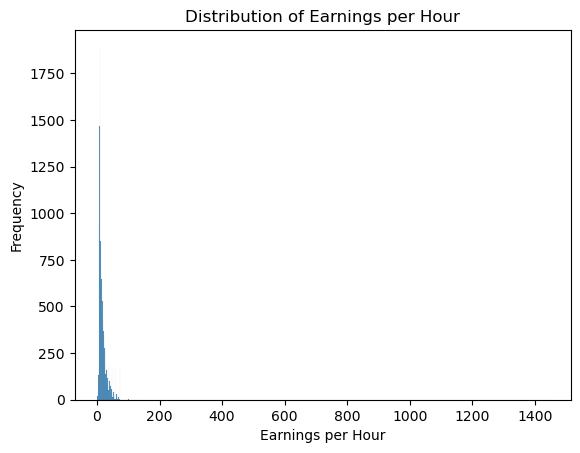

In [11]:
# check the distribution of earnings visualization
sns.histplot(orig_data['w'], kde=False)  # kde=True adds a Kernel Density Estimate line
plt.title('Distribution of Earnings per Hour')
plt.xlabel('Earnings per Hour')
plt.ylabel('Frequency')
plt.show()

Utilizing log earnings seems to be a reasonable approach, particularly because the wage distribution is not even and leans towards the lower end. This distribution exhibits a long tail extending to the right, indicating that a few individuals have significantly higher wages. By transforming earnings into their logarithmic scale, we can address this skewness and achieve a more normalized distribution for our analysis.

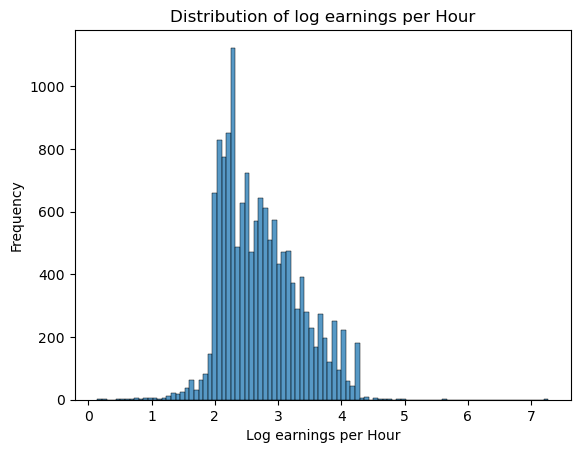

In [12]:
# check the distribution of earnings visualization
sns.histplot(orig_data['lnw'], kde=False)  # kde=True adds a Kernel Density Estimate line
plt.title('Distribution of log earnings per Hour')
plt.xlabel('Log earnings per Hour')
plt.ylabel('Frequency')
plt.show()

The distribution of the natural logarithm of wages (lnw) appears significantly improved and more symmetrical. Therefore, we will proceed with lnw as our target variable for the forthcoming analysis.

## Regression analysis

In our pursuit to create an accurate predictive model for hourly earnings, we've developed four distinct linear regression models, each with varying complexity and depth of analysis:

**Model 1 - Basic Age Model**: We start with the simplest model, focusing solely on the age variable and its higher powers (squared, cubed, and to the fourth power). This model aims to capture the non-linear impact of age on hourly earnings.

**Model 2 - Adding Demographic Variables**: Building on Model 1, we introduce demographic variables such as gender and race to the equation. This model seeks to understand how these factors, in addition to age, influence hourly earnings.

**Model 3 - Including Marital Status, Education, and Children Presence**: In this model, we include variables related to marital status, the presence of children, and education levels (Master's, Professional degree, Ph.D.). This model examines how personal and educational background correlates with earnings.

**Model 4 - Incorporating Job-Related Variables and Interaction Terms**: Our most complex model incorporates job-related factors such as the sector of employment and union membership. Additionally, we introduce interaction terms between age and these job-related variables to investigate if and how the impact of age on earnings varies across different employment conditions.

In [13]:
# Model 1: Linear regression on age and its powers
model1 = "lnw ~ age + agesq + agecu + agequ"

# Model 2: Add gender and race variables
model2 = "lnw ~ age + agesq + agecu + agequ + female + white + afram + asian + hisp"

# Model 3: Add marital status, education and children presence
model3 = "lnw ~ age + agesq + agecu + agequ + female + white + afram + asian + hisp + married + divorced + widowed + nevermar + child0 + child1 + child2 + child3 + child4pl + ed_MA + ed_Profess + ed_Phd"


# Model 4: Add job-related variables and interaction terms
model4 = "lnw ~ age + agesq + agecu + agequ + female + white + afram + asian + hisp + married + divorced + widowed + nevermar + child0 + child1 + child2 + child3 + child4pl + ed_MA + ed_Profess + ed_Phd + fedgov + stagov + locgov + nonprof + union + age:fedgov + age:stagov + age:locgov + age:nonprof + age:union"


model_equations = [model1, model2, model3, model4]


The selection of predictors in these models is driven by a comprehensive understanding of the factors that potentially influence hourly earnings, each model building upon the last to incorporate a richer set of characteristics.

Model 1 (Basic Age Model): This model serves as our baseline, focusing solely on the individual's age and its polynomial terms up to the fourth degree. The choice of age and its powers aims to capture not just the linear but also the more complex, non-linear effects of age on earnings, recognizing that the relationship between age and earnings is not necessarily straightforward.

Model 2 (Demographic Model): Building upon Model 1, this model integrates key demographic variables such as gender and race. These factors are known to impact earnings due to systemic trends in the labor market, like gender pay gaps and racial income disparities. Including these variables allows the model to account for these influences and understand how they interact with age in determining earnings.

Model 3 (Socio-Economic Model): This model further expands by incorporating variables related to marital status, the presence of children, and educational attainment. These socio-economic factors can significantly affect an individual's earning capacity, with marital status potentially reflecting dual-income dynamics, children introducing financial responsibilities, and education level often correlating with job opportunities and earning potential.

Model 4 (Occupational Model): The most comprehensive model includes job-related factors such as employment sector, union membership, and interaction terms between age and these job-related variables. These factors are crucial as they directly relate to an individual's occupation and work environment, which can significantly influence earnings. The interaction terms specifically allow the model to explore if and how the effect of age on earnings varies across different job conditions and sectors.

In [14]:
# estimate regressions
models = []
for equation in model_equations:
    models.append(smf.ols(equation, orig_data).fit(cov_type="HC1"))

In [15]:
stargazer.Stargazer(models)

The R-squared values are most favorable for the 3rd and 4th models, indicating a strong explanatory power. However, considering the simplicity of the 3rd model, it's presumed to be more suitable for use as a predictive model. Nonetheless, we plan to further validate and assess the performance of our models using cross-validation techniques.

## Cross validation

In [16]:
# to check if the function imported and works well
help(ols_crossvalidator)

Help on function ols_crossvalidator in module my_functions:

ols_crossvalidator(formula: str, data: pandas.core.frame.DataFrame, n_folds=5, average_rmse=True) -> dict
    OLS cross-validator
    
    
    Estimates `formula` equation with OLS and returns values of RMSE, R`2, No. coefficients,
    BIC on `data`. Does k-fold cross-validation and either returns train and test RMSE for each
    fold, or return averarage train and test RMSEs.
    
    Parameters
    ----------
    formula : str
        Equation that is estimated by OLS.
    data : pd.DataFrame
        Database in a wide format.
    n_folds : int, default=5
        Number of folds. Must be at least 2.
    average_rmse : bool, default=True
        Whether to return the average train and test RMSE of the k-fold CV, or return
        train and test RMSE-s for each fold.



In [17]:
# Set n_fold = 5 for 5-fold cross-validation
n_fold = 5

Cross-validate models

In [18]:
# Set n_fold = 5 for 5-fold cross-validation
cv_list = []
for equation in model_equations:
    cv_list.append(ols_crossvalidator(equation, orig_data, n_fold, average_rmse=False))
    
(
    pd.DataFrame(cv_list)
    .round(2)
    .assign(
        RMSE=lambda x: x["RMSE"],
        BIC=lambda x: x["BIC"].astype(int),
        Coefficients = lambda x: x["Coefficients"].astype(int),
        Model=["Model " + str(i + 1) for i in range(len(model_equations))],
        Nvars=[1,3,8,15],
    )
    .filter(["Model", "Nvars", "Coefficients", "R-squared", "RMSE", "BIC"])
    .set_index("Model")
)

,Nvars,Coefficients,R-squared,RMSE,BIC
Model,,,,,
Model 1,1,5,0.20,0.55,23988
Model 2,3,10,0.27,0.53,22759
Model 3,8,20,0.29,0.52,22361
Model 4,15,30,0.29,0.52,22438


In [19]:
# showing the folds
pd.DataFrame(
    [cv["Test RMSE"] for cv in cv_list],
    index=["Model " + str(i + 1) for i in range(len(cv_list))],
    columns=["Fold" + str(i + 1) for i in range(len(cv_list[0]["Test RMSE"]))],
).assign(Average=lambda x: x.mean(axis=1)).T.round(2)

,Model 1,Model 2,Model 3,Model 4
Fold1,0.55,0.53,0.52,0.52
Fold2,0.54,0.52,0.51,0.51
Fold3,0.56,0.54,0.53,0.53
Fold4,0.55,0.52,0.51,0.51
Fold5,0.55,0.53,0.52,0.52
Average,0.55,0.53,0.52,0.52


The results from the 5-fold cross-validation reveal a consistent improvement in model performance as we transition from Model 1 to Model 4. The R-squared values indicate an increase in explanatory power, peaking at 0.29 for both Models 3 and 4, suggesting that these models are better at capturing the variance in hourly earnings. However, Model 3, with fewer variables (8 vs. 15) and coefficients (20 vs. 30), achieves a similar level of predictive accuracy as Model 4, as evidenced by comparable RMSE values (0.52 for both models) and a lower BIC(22361 vs 22438), indicating a better balance between model complexity and performance. The cross-validation results, with nearly identical average RMSE values for Models 3 and 4 across all folds, further support the notion that Model 3 is a more efficient choice for predicting hourly earnings without sacrificing predictive power. This analysis underscores the importance of considering model simplicity alongside predictive accuracy, especially when incremental increases in complexity do not translate into significant performance gains.

## Prediction

We are eager to see how these models perform with real-world data. It's important to understand their practical applicability and effectiveness in live scenarios.

In [20]:
# entering new data
new = pd.DataFrame(
    {
        "age": [30],
        "agesq": [30**2],
        "agecu": [30**3],
        "agequ": [30**4],
        "female": [0],  # 0 for male, 1 for female (assuming binary gender for simplicity)
        "white": [1],
        "afram": [0],
        "asian": [0],
        "hisp": [0],
        "married": [1],# assuming married
        "divorced": [0],
        "widowed": [0],
        "nevermar": [0],
        "child0": [1],  # assuming no children
        "child1": [0],
        "child2": [0],
        "child3": [0],
        "child4pl": [0],
        "ed_MA": [0],
        "ed_Profess": [0],  
        "ed_Phd": [1],  # assuming education level is PHD
    }
)

new


,age,agesq,agecu,agequ,female,white,afram,asian,hisp,married,divorced,widowed,nevermar,child0,child1,child2,child3,child4pl,ed_MA,ed_Profess,ed_Phd
0,30,900,27000,810000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [21]:
# picking model number 3
reg3 = models[2]

In [22]:
# making prediction in logs
prediction = pd.DataFrame(
    [
        point_predict_with_conf_int(reg3, new, interval_precision=0.8),
    ],
    index=["Model in logs"],
).T

In [23]:
# to recalculate predictions to level, we need to extract the rmse
rmse3 = rmse(reg3.fittedvalues, orig_data["lnw"])

Prediction in levels

In [24]:
# Calculate the point prediction in log scale and convert it to level (actual scale) by exponentiating
# and adjusting for variance.
log_point_prediction_new = prediction.loc["Point prediction"].values[0]
level_point_prediction_new = np.exp(log_point_prediction_new) * np.exp(rmse3**2 / 2) # Adjust for log transformation bias

Prediction interval (log and level)

In [25]:
# Extract the upper and lower bounds of the 80% prediction interval in log scale.
intervals = prediction.loc["Prediction Interval (80%)"].values[0]
log_lower_interval_prediction_new = intervals[0]
log_upper_interval_prediction_new = intervals[1]

In [26]:
# Convert the log scale prediction intervals to the level (actual scale) and adjust for variance.
level_lower_interval_prediction_new = np.exp(
    log_lower_interval_prediction_new
) * np.exp(rmse3**2 / 2)
level_upper_interval_prediction_new = np.exp(
    log_upper_interval_prediction_new
) * np.exp(rmse3**2 / 2)

In [27]:
# Recalculate the point and interval predictions to the level (actual scale) and round the interval values for presentation.
prediction["Recalculated to level"] = [
    level_point_prediction_new,
    [
        round(level_lower_interval_prediction_new, 2),
        round(level_upper_interval_prediction_new, 2),
    ],
]

Add level model prediction

In [28]:
# Fit the level model (Model 3 without log transformation) using ordinary least squares regression.
levelreg3 = smf.ols(model3.replace("ln", ""),orig_data).fit()

In [29]:
# Generate point predictions and 80% confidence intervals for the new data using the level model.
prediction["Model in levels"] = point_predict_with_conf_int(levelreg3, new, interval_precision=0.8)

In [30]:
# Format the prediction intervals to have a consistent appearance and to be more interpretable.
prediction.loc["Prediction Interval (80%)", :] = prediction.loc[
    "Prediction Interval (80%)", :
].apply(format_confidence_interval)

In [31]:
# check the prediction
prediction

,Model in logs,Recalculated to level,Model in levels
Point prediction,3.5,37.862749,37.06
Prediction Interval (80%),[2.83–4.17],[19.37–73.99],[14.78–59.34]


The model's prediction for a 30-year-old, white, married sales representative male with no children and a Ph.D. degree suggests an hourly earnings of 3.5 on the logarithmic scale. When this figure is translated back to the actual earnings scale, it corresponds to an estimated hourly earning of approximately 37.86. If we look at the direct hourly earnings estimate from the model in levels, it's slightly lower, at around 37.06. These estimates reflect the model's understanding of the relationship between an individual's characteristics—particularly the high level of education in this case—and their earning potential.

The 80% prediction interval provides a range for the expected hourly earnings, accounting for the inherent uncertainty in the model's estimates. On the log scale, this interval spans from 2.83 to 4.17, which when converted to actual earnings, translates to a range of about 19.37 to 73.99. Meanwhile, the direct level prediction offers a narrower interval, ranging from 14.78 to 59.34. These intervals capture the variability and potential uncertainty in the hourly earnings for an individual with these specific characteristics, offering a realistic understanding of the possible range of earnings and emphasizing the model's confidence in its predictions.